In [2]:
import matplotlib.pyplot as plt
from cycler import cycler
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from os import listdir
import matplotlib.patheffects as pe
import numpy as np
import scikitl
%matplotlib inline

In [3]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
jtplot.style('matt')
AllFontSize=18

colors=['#4878CF', '#6ACC65', '#D65F5F', '#C4AD66','#77BEDB', '#B47CC7','gray','#98b5f4','#fd97ee','#a30063']
colors_new=cycler(color=['#4878CF', '#6ACC65', '#D65F5F', '#C4AD66','#77BEDB', '#B47CC7','gray','#98b5f4','#fd97ee','#a30063'])

plt.rcParams['axes.prop_cycle'] = colors_new
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.labelsize'] = AllFontSize
plt.rcParams['axes.linewidth']='0.8'
plt.rcParams['axes.grid']=True
plt.rcParams['axes.titlesize'] = AllFontSize
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.alpha'] = 1
plt.rcParams['legend.fontsize'] = AllFontSize
plt.rcParams['legend.frameon'] = False 
plt.rcParams['xtick.labelsize'] = AllFontSize
plt.rcParams['ytick.labelsize'] = AllFontSize
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.right']=False
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.size']=2
plt.rcParams['ytick.minor.size']=2
plt.rcParams['savefig.bbox']='tight'
plt.rcParams['font.sans-serif'] = "CMU Sans Serif"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['mathtext.fontset'] = 'cm' 

In [23]:
# class Model:
#     def __init__(self,):
        
def ImportData(directory):
    #IMPORTING DATA FROM SENSOR FILES
    #THERE ARE TWO FILES - ONE WITH PREFIX A AND ONE WITH PREFIX B
    Folder=directory
    FileNames=[Name for Name in listdir(Folder) if not Name[0] == '.']
    
    #INITIALIZING SEPARATE DATA DICT FOR DIFFERENT FILE TYPES
    AllDataA={}
    AllDataB={}
    
    #DIFFERENT CHANNELS COMMING IN FOR DIFFERENT FILES
    aHeaders=['TA','C1','C3','C5','F2','F4','F6','F8','F10']
    bHeaders=['TB','C2','C4','P','F1','F3','F5','F7','F9']
    #COMBINING ALL CHANNELS
    allHeaders=aHeaders+bHeaders
    for Name in FileNames:
        print("Successfully Imported File:",Name)
        RunName=Name.split('.')[0].split('_')[0]
        RunType=Name.split('.')[0].split('_')[1]
        if RunType=='a':
            AllDataA[RunName]=pd.read_csv(Folder+Name,names=aHeaders)
        if RunType=='b':
            AllDataB[RunName]=pd.read_csv(Folder+Name,names=bHeaders)
                
    return AllDataA,AllDataB

DataA,DataB=ImportData('2019-05-06_FirstTrialData/')

Successfully Imported File: apple_a.csv
Successfully Imported File: apple_b.csv
Successfully Imported File: idk_a.csv
Successfully Imported File: idk_b.csv
Successfully Imported File: k1p1_a.csv
Successfully Imported File: k1p1_b.csv
Successfully Imported File: k1p5_a.csv
Successfully Imported File: k1p5_b.csv
Successfully Imported File: k1_a.csv
Successfully Imported File: k1_b.csv
Successfully Imported File: k2_a.csv
Successfully Imported File: k2_b.csv
Successfully Imported File: nothing_a.csv
Successfully Imported File: nothing_b.csv
Successfully Imported File: WoodBall_a.csv
Successfully Imported File: WoodBall_b.csv


In [38]:
def MergeAandBData(AllDataA,AllDataB):
    Data={}
    for key in AllDataA.keys():
        Data[key]=pd.merge(AllDataA[key],AllDataB[key],left_index=True, right_index=True, how='inner')
    return Data
Data=MergeAandBData(DataA,DataB)

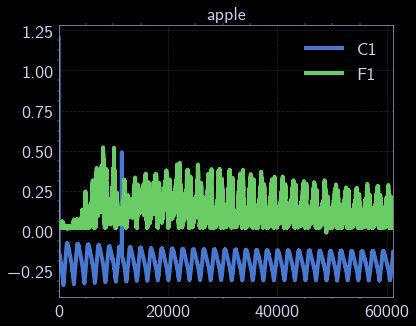

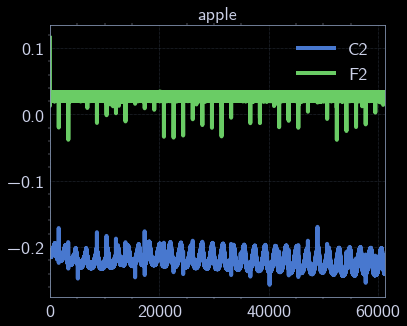

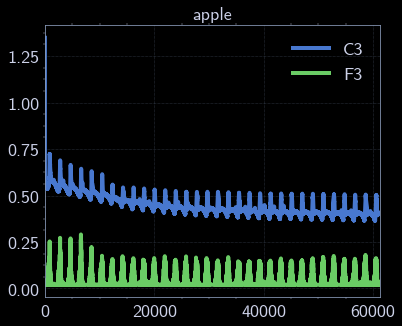

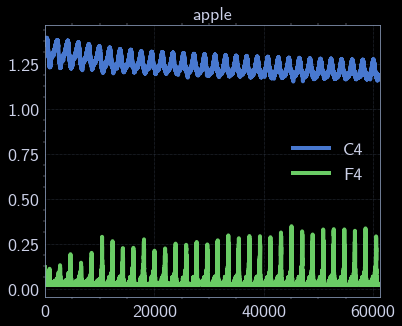

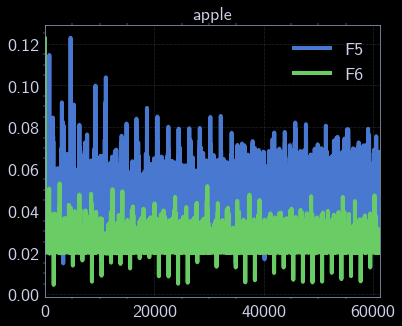

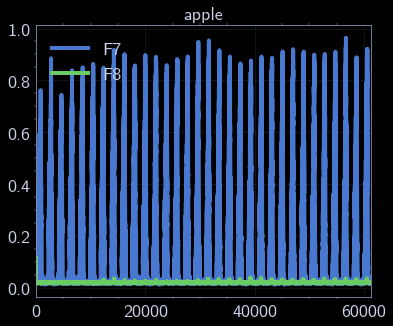

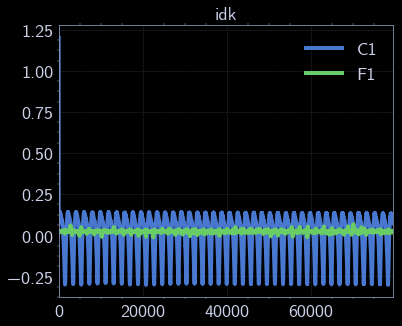

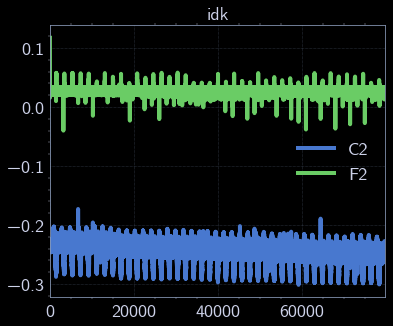

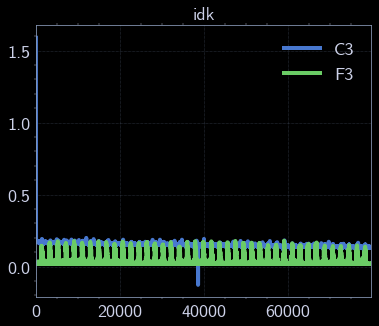

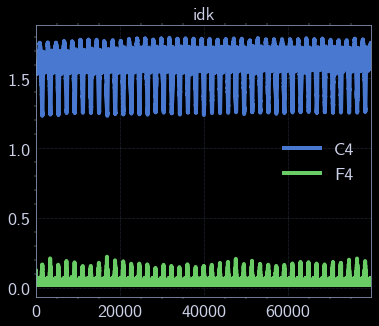

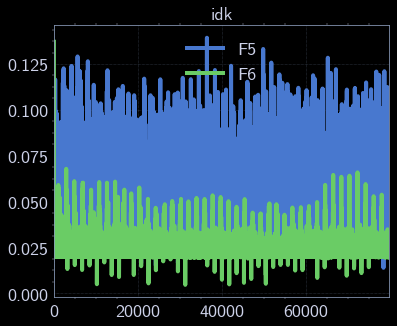

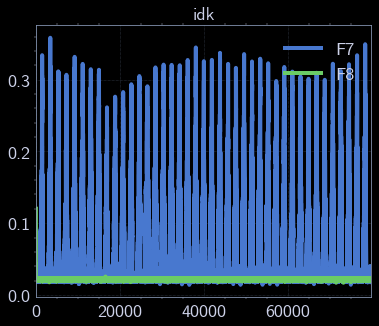

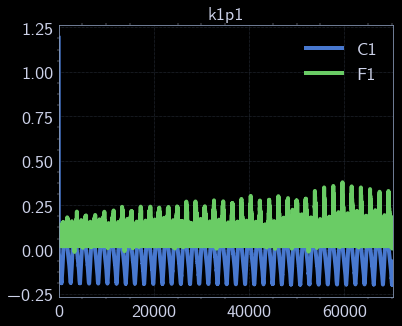

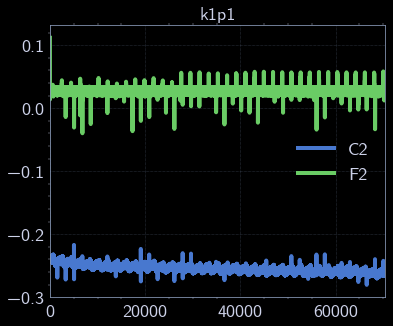

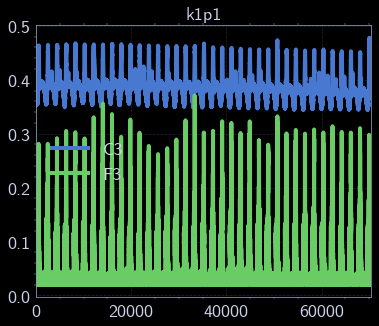

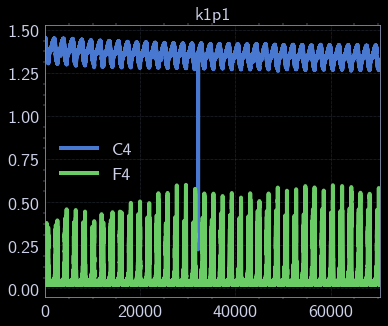

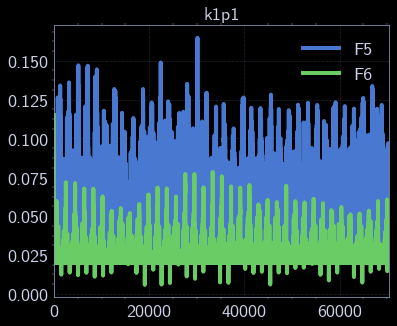

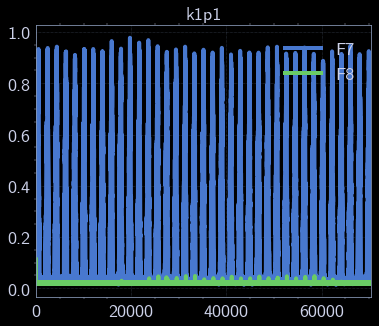

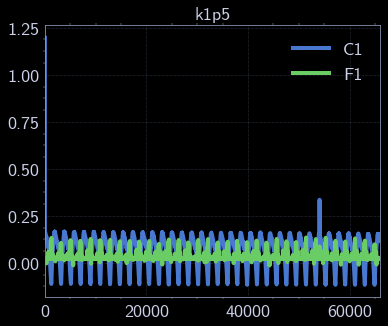

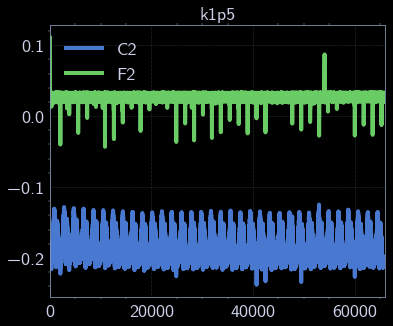

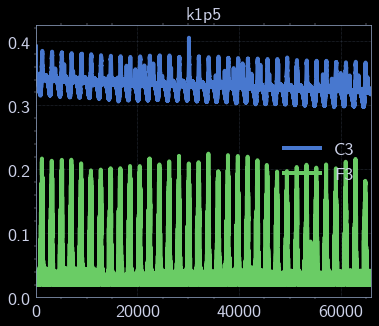

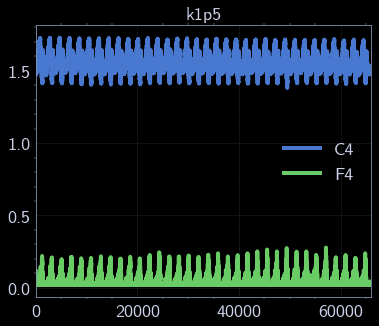

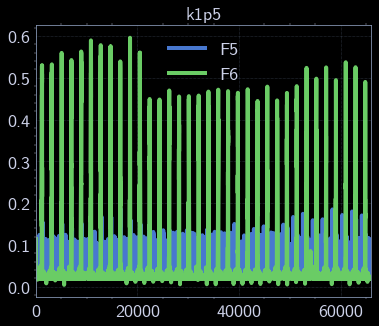

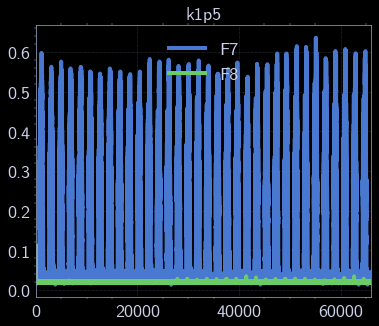

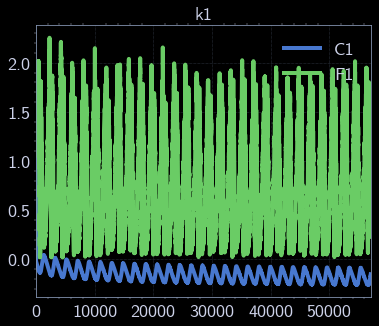

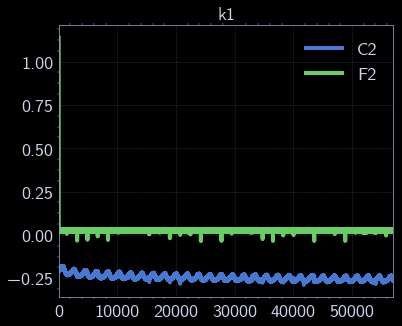

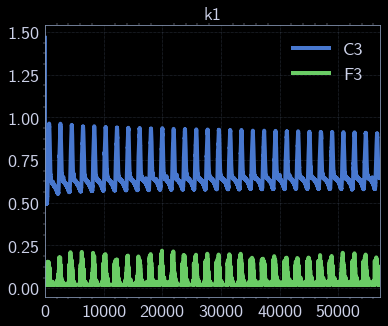

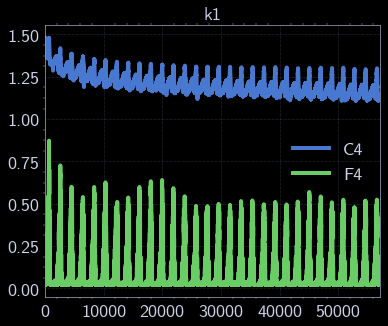

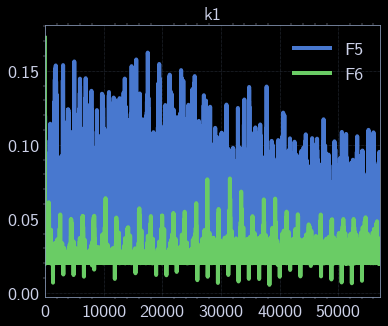

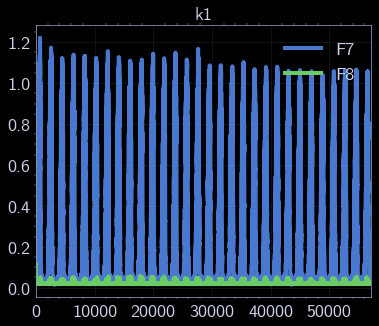

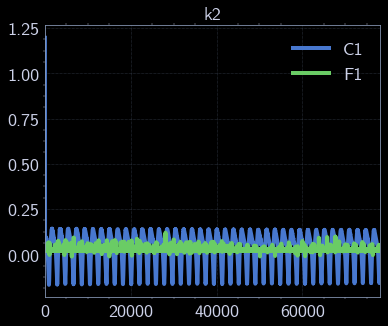

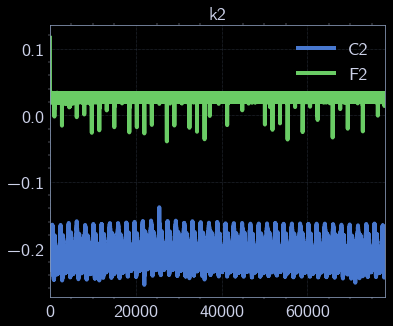

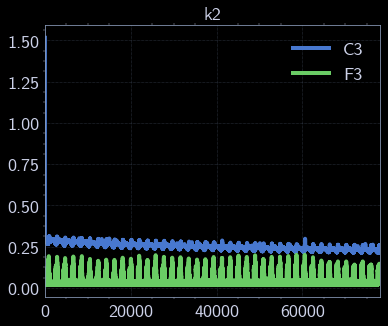

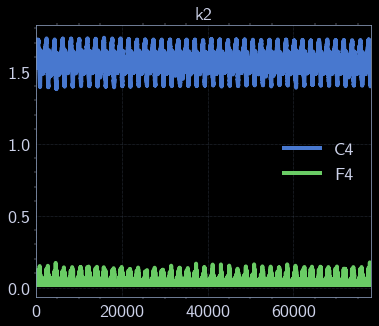

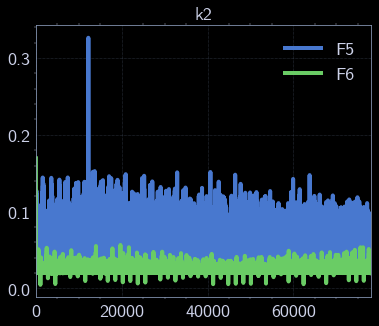

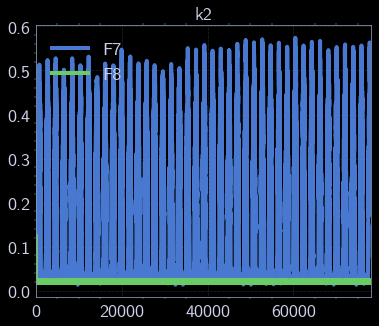

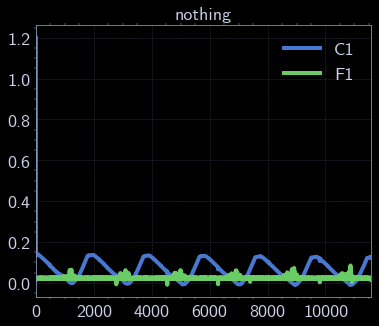

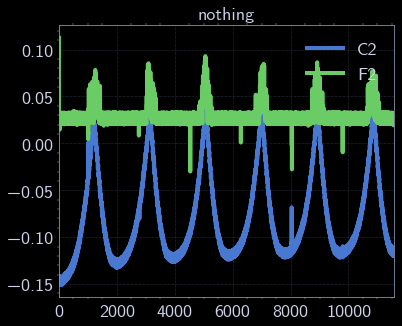

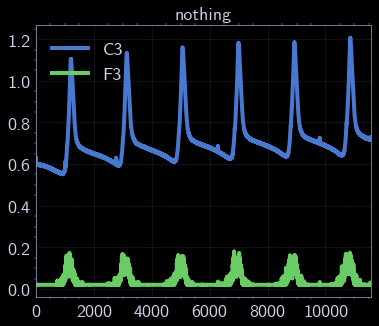

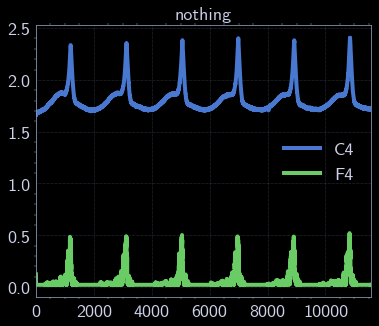

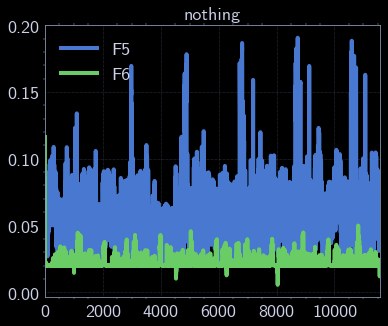

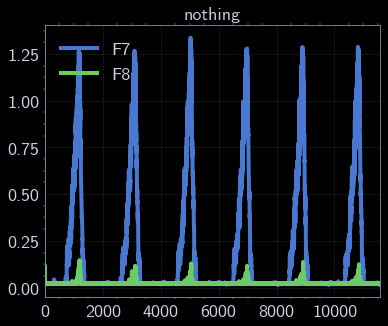

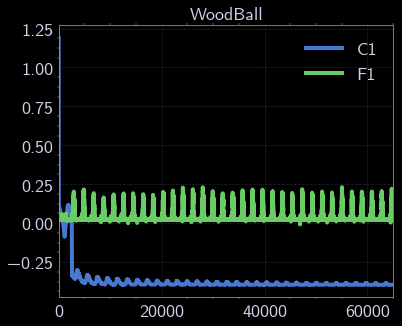

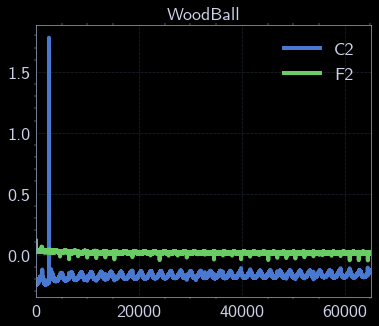

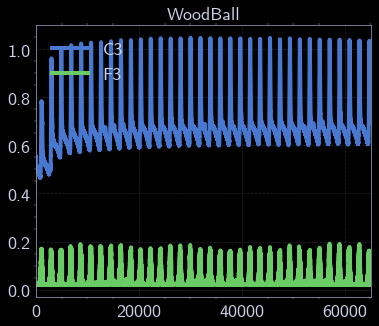

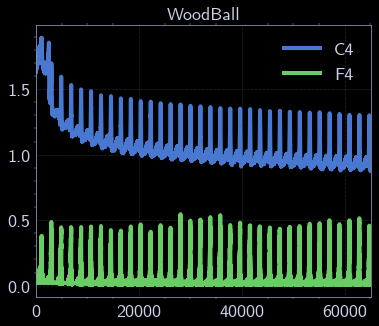

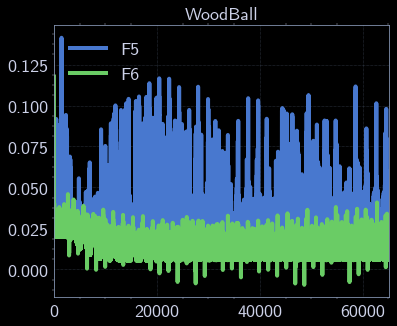

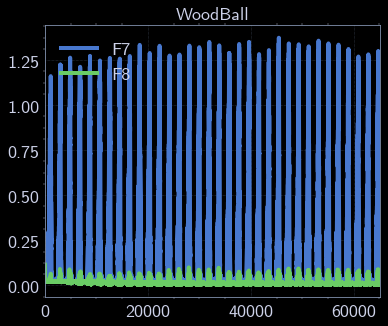

In [56]:
for key in Data.keys():
    Data[key].plot(y=['C1','F1'])
    plt.title(key)
    Data[key].plot(y=['C2','F2'])
    plt.title(key)
    Data[key].plot(y=['C3','F3'])
    plt.title(key)
    Data[key].plot(y=['C4','F4'])
    plt.title(key)
    Data[key].plot(y=['F5','F6'])
    plt.title(key)
    Data[key].plot(y=['F7','F8'])
    plt.title(key)

In [53]:
def EmbedLabels(AllData):
    EmbededData=pd.DataFrame()
    for key in AllData.keys():
        AllData[key]['value']=key
    EmbededData=pd.concat(AllData,ignore_index=True)    
    return EmbededData

# def TrainTestSets(AllData,TrainPercent):
EmbededData=EmbedLabels(Data)
EmbededData.head(100000)

,TA,C1,C3,C5,F2,F4,F6,F8,F10,TB,C2,C4,P,F1,F3,F5,F7,F9,value
0,0.010918,1.190621,0.552517,-0.010595,0.112779,0.116251,0.117677,0.114301,0.120666,0.029132,-0.247143,1.634803,0.268921,0.020386,0.020094,0.053644,0.018935,0.027371,WoodBall
1,0.046850,0.114397,0.515252,-0.074073,0.021446,0.020973,0.020311,0.020518,0.024131,0.073010,-0.243323,1.641114,0.271736,0.020344,0.020079,0.029890,0.018563,0.022824,WoodBall
2,0.090318,0.114280,0.514817,-0.074455,0.021108,0.020847,0.020741,0.019383,0.024021,0.107605,-0.243562,1.642023,0.273940,0.020243,0.020128,0.041688,0.017637,0.022431,WoodBall
3,0.124876,0.114133,0.514773,-0.077019,0.021150,0.020897,0.024149,0.019408,0.024030,0.142129,-0.243804,1.642759,0.276072,0.020194,0.020143,0.045510,0.018590,0.022862,WoodBall
4,0.159718,0.113588,0.512708,-0.078339,0.021279,0.020897,0.024392,0.019380,0.025226,0.177050,-0.244210,1.635197,0.278111,0.020467,0.020120,0.044806,0.018641,0.032005,WoodBall
5,0.194317,0.113864,0.512389,-0.076362,0.021468,0.020958,0.021387,0.020190,0.026794,0.211560,-0.247864,1.636737,0.280000,0.018948,0.020894,0.045895,0.018898,0.030347,WoodBall
6,0.228812,0.113661,0.510829,-0.074600,0.021368,0.020967,0.020690,0.022299,0.025308,0.246075,-0.247546,1.623881,0.280955,0.016350,0.020824,0.061035,0.018477,0.025263,WoodBall
7,0.263320,0.113541,0.514770,-0.074288,0.021435,0.020949,0.020327,0.020682,0.024125,0.280597,-0.244913,1.640676,0.284044,0.020443,0.020501,0.062547,0.018654,0.022906,WoodBall
8,0.298414,0.113294,0.514532,-0.074284,0.019882,0.021349,0.019868,0.019581,0.024016,0.315638,-0.243443,1.641899,0.286465,0.025223,0.020154,0.048429,0.018567,0.022297,WoodBall
9,0.332858,0.112783,0.513926,-0.075245,0.028295,0.021135,0.020246,0.019420,0.024041,0.350260,-0.243407,1.641576,0.287974,0.019415,0.022237,0.043951,0.017547,0.022870,WoodBall
